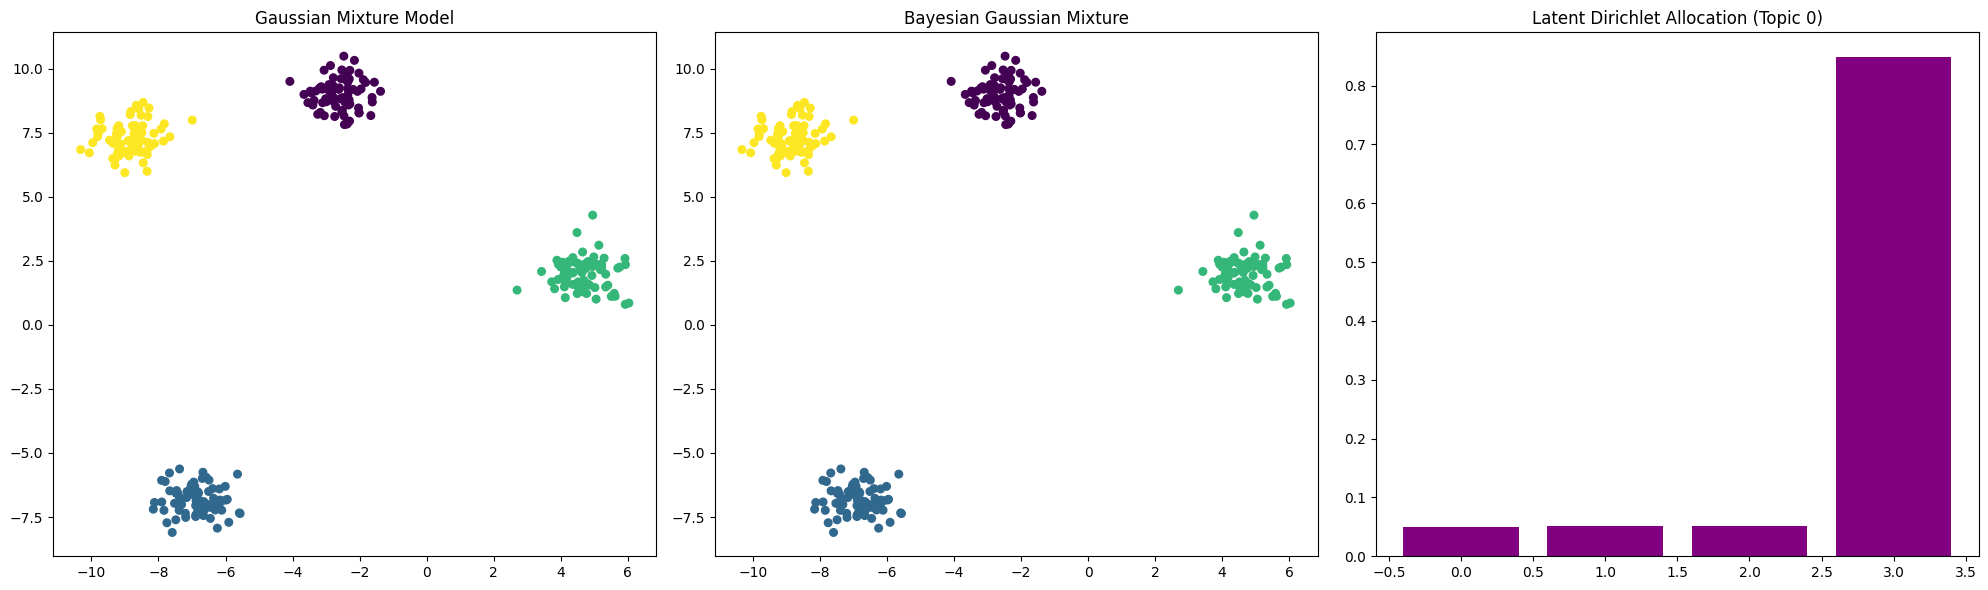

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Generate synthetic data for GMM and Bayesian GMM
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Generate synthetic text data for LDA
corpus = [
    "Machine learning is amazing",
    "Deep learning is a subset of machine learning",
    "Natural language processing is fascinating",
    "I love studying AI and machine learning",
    "Data science is closely related to machine learning",
    "AI is transforming the world",
    "Neural networks are a key concept in deep learning",
    "Big data and AI are driving innovation",
    "Machine learning models can predict outcomes",
    "Text mining is a part of natural language processing"
]
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(corpus)

# Probabilistic clustering models
models = {
    "Gaussian Mixture Model": GaussianMixture(n_components=4, covariance_type='full', random_state=42),
    "Bayesian Gaussian Mixture": BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=42),
    "Latent Dirichlet Allocation": LatentDirichletAllocation(n_components=4, random_state=42)
}

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gaussian Mixture Model
gmm_labels = models["Gaussian Mixture Model"].fit_predict(X)
axes[0].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=30)
axes[0].set_title("Gaussian Mixture Model")

# Bayesian Gaussian Mixture
bgmm_labels = models["Bayesian Gaussian Mixture"].fit_predict(X)
axes[1].scatter(X[:, 0], X[:, 1], c=bgmm_labels, cmap='viridis', s=30)
axes[1].set_title("Bayesian Gaussian Mixture")

# Latent Dirichlet Allocation
lda_model = models["Latent Dirichlet Allocation"].fit(X_text)
lda_topics = lda_model.transform(X_text)
axes[2].bar(range(lda_topics.shape[1]), lda_topics[0], color='purple')
axes[2].set_title("Latent Dirichlet Allocation (Topic 0)")

plt.tight_layout()
plt.show()


基于概率的聚类（Probabilistic Clustering）是一种通过概率模型对数据进行聚类的方法。此类方法通常假设数据点来自某些概率分布（例如高斯分布）并通过最大化似然估计或贝叶斯推断来优化模型参数。

---

### **1. 主要模型**

#### **1.1 高斯混合模型（Gaussian Mixture Model, GMM）**
   - **全称**：Gaussian Mixture Model (GMM)
   - **特点**：
     - 假设数据点由多个高斯分布的混合组成。
     - 每个簇对应一个高斯分布。
     - 使用期望最大化（EM）算法拟合参数。
   - **适用场景**：
     - 数据呈高斯分布，簇的形状不一定是球形。
     - 需要计算簇的概率分布。
   - **优点**：
     - 支持软分配（点属于某簇的概率）。
     - 能处理不同形状的簇。
   - **缺点**：
     - 对初始参数敏感。
     - 数据需要符合高斯假设。

#### **1.2 潜在狄利克雷分布（Latent Dirichlet Allocation, LDA）**
   - **全称**：Latent Dirichlet Allocation (LDA)
   - **特点**：
     - 通常用于文本聚类（主题建模）。
     - 假设文档由主题的概率分布组成，每个主题由单词的概率分布组成。
   - **适用场景**：
     - 文本数据的主题建模。
   - **优点**：
     - 适合高维稀疏数据。
   - **缺点**：
     - 参数解释性有限。
     - 假设数据是离散分布。

#### **1.3 贝叶斯高斯混合模型（Bayesian Gaussian Mixture）**
   - **全称**：Bayesian Gaussian Mixture
   - **特点**：
     - GMM 的贝叶斯版本，加入了先验分布。
     - 自动确定最佳簇数。
   - **适用场景**：
     - 不确定簇数时。
   - **优点**：
     - 自动调整簇数。
     - 更鲁棒。
   - **缺点**：
     - 计算复杂度较高。


---

### **3. 总结对比表**

| **方法**                  | **特点**                                   | **适用场景**                       | **优点**                               | **缺点**                             |
|---------------------------|--------------------------------------------|------------------------------------|----------------------------------------|--------------------------------------|
| **GMM**                   | 假设簇为高斯分布                          | 符合高斯分布的数据，软分配         | 支持复杂形状簇，软分配                 | 参数敏感，对高斯假设依赖强            |
| **Bayesian Gaussian Mixture** | GMM 的贝叶斯扩展                         | 不确定簇数的数据                   | 自动调整簇数，更鲁棒                   | 计算复杂度高                          |
| **LDA**                   | 基于主题建模，适合文本数据                 | 文本数据的主题聚类                 | 高维稀疏数据表现好，支持多主题         | 假设数据离散，难以解释复杂分布        |

